## Airline Passenger Forecasting using RNN, LSTM & GRU

In this lab, we will estimate the number of passengers in the coming years by analysing the number of passengers in the past years.

In [1]:
# # Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

This dataset contains how many passengers traveled monthly from 1949 to 1960. 


**Month: the date in the month is a variable.** 


**Passengers: estimates the number of passengers per month.**

In [2]:
# # Import and show dataset
data = pd.read_csv("international-airline-passengers.csv")
print("Shape of Data: ", data.shape)
data.head()

Shape of Data:  (145, 2)


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


<AxesSubplot:>

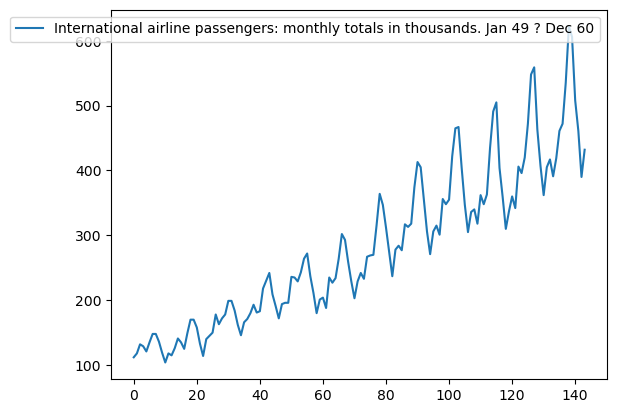

In [3]:
# Plot data
data.plot()

In [4]:
data.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
# Drop the row with NaN
data=data.dropna(how='any',axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           144 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [6]:
# # Create a dataframe with only the number of passengers
df=data.drop('Month', axis=1)
# # Convert the dataframe to a numpy array
df=df.values
print(df[:5])

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]]


In [7]:
# Scale the data to make it applicable for RNN
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)
df_scaled[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [8]:
# Split data into predictors and outcomes
# predict the number of passengers using by the past 6 months' number of passengers
X = []
y = []
sequence = 6
for i in range(len(df_scaled) - sequence):
    X.append(df_scaled[i:(i + sequence), 0])
    y.append(df_scaled[i + sequence, 0])

X = np.array(X)
y = np.array(y)


In [9]:
print("Predictors")
print(X[:5])
print("Outcomes")
print(y[:5])

Predictors
[[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556]
 [0.02702703 0.05405405 0.04826255 0.03281853 0.05984556 0.08494208]
 [0.05405405 0.04826255 0.03281853 0.05984556 0.08494208 0.08494208]
 [0.04826255 0.03281853 0.05984556 0.08494208 0.08494208 0.06177606]
 [0.03281853 0.05984556 0.08494208 0.08494208 0.06177606 0.02895753]]
Outcomes
[0.08494208 0.08494208 0.06177606 0.02895753 0.        ]


In [10]:
# # Reshape the predictor 
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(138, 6, 1)

In [11]:
# # Split data into training and test sets 

# # Set the size of training and test data
# # Use 75% of the data for training
train_size = math.ceil(len(X) * 0.75)
test_size = len(X - train_size)

# # Split X and y into training and test sets
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:len(X),:]
y_test = y[train_size:len(y)]

In [12]:
# # Show the size of training and test sets
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train:  (104, 6, 1)
y_train:  (104,)
X_test :  (34, 6, 1)
y_test :  (34,)


In [13]:
# Simple RNN model
rnn=Sequential()
rnn.add(SimpleRNN(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32))
rnn.add(Dense(units=1))


In [14]:
# SimpleRNN summary
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 32)             1088      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Compile SimpleRNN model (Adam optimizer, Mean_squared_error loss)
rnn.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# LSTM model
lstm=Sequential()
lstm.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32))
lstm.add(Dense(units=1))


In [17]:
# LSTM summary
lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 6, 32)             8320      
                                                                 
 lstm_2 (LSTM)               (None, 6, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Compile LSTM model (Adam optimizer, Mean_squared_error loss) 
lstm.compile(optimizer='adam', loss='mean_squared_error')


In [19]:
# GRU model
gru=Sequential()
gru.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32))
gru.add(Dense(units=1))


In [20]:
# GRU summary
gru.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 6, 32)             3360      
                                                                 
 gru_1 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_2 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Compile GRU model (Adam optimizer, Mean_squared_error loss) 
gru.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Set Early Stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=40)
early_stop = EarlyStopping(monitor='val_loss', patience=40)


In [23]:
# Fit Simple RNN model (batch=16, epochs=1000)
rnn_history=rnn.fit(X_train, y_train, batch_size=16, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
7/7 [==============================] - 2s 53ms/step - loss: 0.0924 - val_loss: 0.1412
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.0247
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0189 - val_loss: 0.0530
Epoch 4/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0124 - val_loss: 0.0628
Epoch 5/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.0365
Epoch 6/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - val_loss: 0.0385
Epoch 7/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - val_loss: 0.0355
Epoch 8/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0314
Epoch 9/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0368
Epoch 10/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0320
Epoch 11/1000
7/7 

Epoch 84/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0148
Epoch 85/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0121
Epoch 86/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0101
Epoch 87/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0148
Epoch 88/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0161
Epoch 89/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0198
Epoch 90/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0250
Epoch 91/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 0.0151
Epoch 92/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0202
Epoch 93/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0184
Epoch 94/1

In [24]:
# Fit LSTM model (batch=16, epochs=1000)
lstm_history=lstm.fit(X_train, y_train, batch_size=16, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
7/7 [==============================] - 4s 134ms/step - loss: 0.0760 - val_loss: 0.2866
Epoch 2/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0341 - val_loss: 0.1023
Epoch 3/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0207 - val_loss: 0.0685
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0185 - val_loss: 0.1018
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0167 - val_loss: 0.0906
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0133 - val_loss: 0.0448
Epoch 7/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0116 - val_loss: 0.0457
Epoch 8/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0104 - val_loss: 0.0441
Epoch 9/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0100 - val_loss: 0.0407
Epoch 10/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0104 - val_loss: 0.0406
Epoch 11/1000
7

In [25]:
# Fit GRU model (batch=16, epochs=1000)
gru_history=gru.fit(X_train, y_train, batch_size=16, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/1000
7/7 [==============================] - 5s 131ms/step - loss: 0.0489 - val_loss: 0.0755
Epoch 2/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0234 - val_loss: 0.0547
Epoch 3/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0145 - val_loss: 0.1000
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0133 - val_loss: 0.0539
Epoch 5/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0110 - val_loss: 0.0364
Epoch 6/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0084 - val_loss: 0.0411
Epoch 7/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0085 - val_loss: 0.0311
Epoch 8/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0079 - val_loss: 0.0352
Epoch 9/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0079 - val_loss: 0.0317
Epoch 10/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0079 - val_loss: 0.0338
Epoch 11

7/7 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 0.0135
Epoch 84/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0108
Epoch 85/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0111
Epoch 86/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0113
Epoch 87/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 0.0113
Epoch 88/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0118
Epoch 89/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0101
Epoch 90/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0021 - val_loss: 0.0103
Epoch 91/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0129
Epoch 92/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0091
Epoch 93/1000
7/7

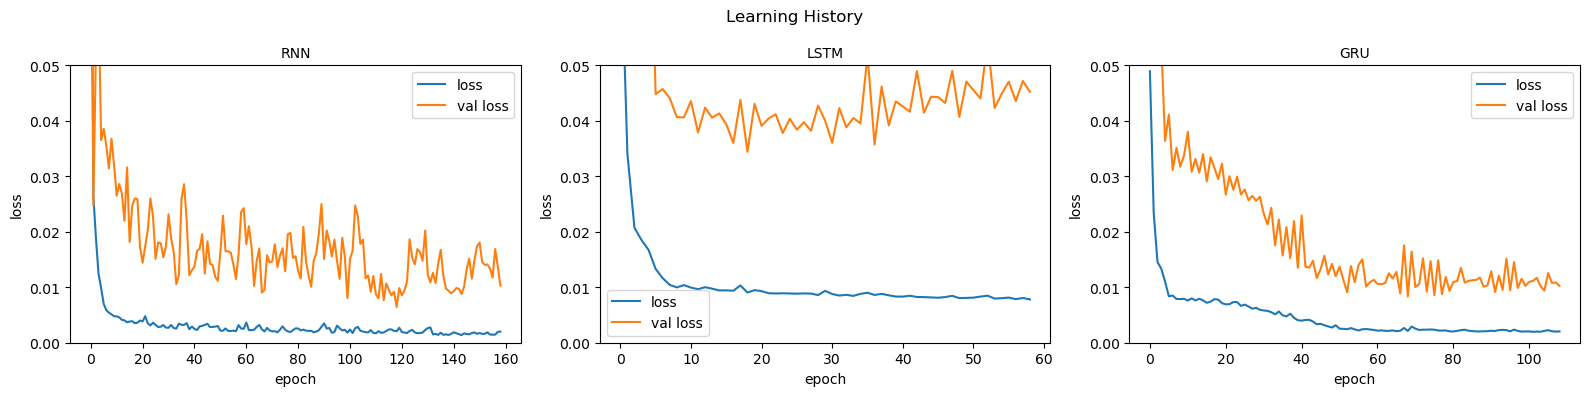

In [26]:
# # Visualize Training History

# # Set subplot subtitles
titles = ['RNN', 'LSTM', 'GRU']

# # Create a list of prediction models
models = [rnn_history, lstm_history, gru_history]
# # Set the plot area
fig, ax = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)  

# # Plot learning history
plt.suptitle('Learning History')
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i], fontsize=10) 
    plt.plot(models[i].history['loss'], label='loss')
    plt.plot(models[i].history['val_loss'], label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.ylim([0,0.05])

In [27]:
# # Make predictions and reverse the predicted value to real number

# # Predict by RNN model
rnn_y_pred=rnn.predict(X_test)
rnn_y_pred=scaler.inverse_transform(rnn_y_pred)

# # Predict by LSTM model
lstm_y_pred=lstm.predict(X_test)
lstm_y_pred=scaler.inverse_transform(lstm_y_pred)

# # Predict by GRU model
gru_y_pred=gru.predict(X_test)
gru_y_pred=scaler.inverse_transform(gru_y_pred)

# # Reverse test data to real number
y_test=y_test.reshape(y_test.shape[0],1)
y_test=scaler.inverse_transform(y_test)

2/2 [==============================] - 1s 3ms/step


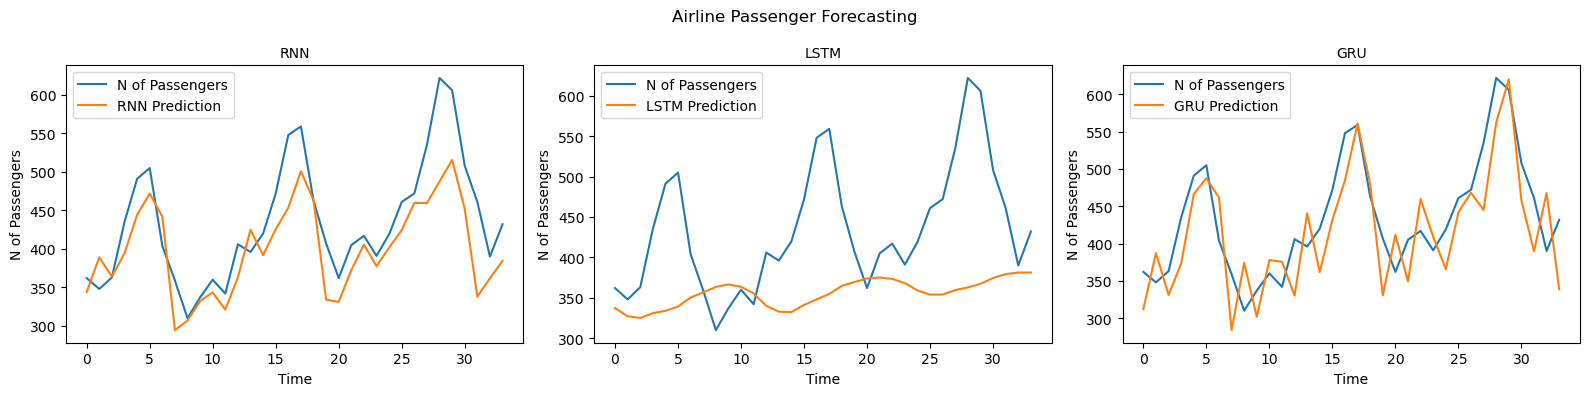

In [28]:
# # Visualize Prediction Results

# # Set subplot subtitles
titles = ['RNN', 'LSTM', 'GRU']

# # Create a list of prediction models
models = [rnn_y_pred, lstm_y_pred, gru_y_pred]

# # Set the plot area
fig, ax = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)  

# # Set the title
plt.suptitle('Airline Passenger Forecasting')

# # Create and show subplots
for i in range(0, 3):
        plt.subplot(1, 3,i+1)
        plt.title(titles[i], fontsize=10) 
        plt.plot(y_test, label='N of Passengers')
        plt.plot(models[i], label=titles[i]+' Prediction')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('N of Passengers') 